Plot metrics


In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/m.caros/work/3DSemanticSegmentation')
from utils.utils import *
from utils.utils_plot import *
from utils.get_metrics import *


In [ ]:
# # get min and max z
# path_files='/dades/LIDAR/towers_detection/datasets/DALES/dales_25x25/train'
# files = glob.glob(os.path.join(path_files, '*.pt'))
# z_min = []
# z_max = []

# for point_file in files:
#     with open(point_file, 'rb') as f:
#         pc = torch.load(f).numpy()  # [points, dims]
    
#     z = pc[:, 2]
#     z_min.append(np.min(z))
#     z_max.append(np.max(z))

# # Convert to numpy arrays if needed
# z_min = np.array(z_min)
# z_max = np.array(z_max)

# print("First 5 min z values:", z_min[:5])
# print("First 5 max z values:", z_max[:5])

First 5 min z values: [83.37 29.36 79.89 92.47  3.97]
First 5 max z values: [ 95.06  40.44 107.57 114.52  21.62]


In [ ]:
# z_min.min()

-1.82

In [ ]:
# z_max.max()

197.03

In [2]:
# iou_types = ['ground iou', 'powerlines iou', 'poles iou', 'veg iou', 'fences iou', 'buildings iou', 'cars iou', 'trucks iou']


In [2]:
model_data = {}

# Step 1: Load all CSV files
csv_files = glob.glob("/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/results_DALES/*.csv")  # Adjust this path to your files
wresults = {}
mean_results={}
print(f'Length files: {len(csv_files)}')

# Step 2: Calculate weighted IoU for each file
for file in csv_files:
    try:
        model_name = file.split("/")[-1].replace(".csv", "")
        df = pd.read_csv(file)
        df = df.sort_values(by='Tile')#.reset_index(drop=True)
        # Remove 'pt' and convert to int
        df['Tile'] = df['Tile'].astype(int)
        # print(df.columns)

        # Replace "nan" with actual NaN values for calculations
        df = df[['Tile', 'ground iou', 'powerline iou', 'poles iou', 'veg iou', 'buildings iou', 'cars iou', 'mean iou', 'pts. ground', 'pts. powerline', 'pts. poles', 'pts. veg', 'pts. buildings', 'pts. cars']].replace("nan", pd.NA).astype(float)  # Convert "nan" to NaN for calculations
        model_data[model_name] = df
        
        # Weighted IoU calculations for each class
        ground_weighted_iou = (df['ground iou'] * df['pts. ground']).sum() / df['pts. ground'].sum()
        powerline_weighted_iou = (df['powerline iou'] * df['pts. powerline']).sum() / df['pts. powerline'].sum()
        poles_weighted_iou = (df['poles iou'] * df['pts. poles']).sum() / df['pts. poles'].sum()
        veg_weighted_iou = (df['veg iou'] * df['pts. veg']).sum() / df['pts. veg'].sum()
        # fences_weighted_iou = (df['fences iou'] * df['pts. fences']).sum() / df['pts. fences'].sum()
        buildings_weighted_iou = (df['buildings iou'] * df['pts. buildings']).sum() / df['pts. buildings'].sum()
        cars_weighted_iou = (df['cars iou'] * df['pts. cars']).sum() / df['pts. cars'].sum()
        # surr_weighted_iou = (df['surr iou'] * df['pts. surr']).sum() / df['pts. surr'].sum()

        # Mean IoU across all classes
        mean_iou = np.nanmean([
            ground_weighted_iou, powerline_weighted_iou, poles_weighted_iou,
            veg_weighted_iou, buildings_weighted_iou,
            cars_weighted_iou
        ])

        # Store results in dictionary
        wresults[model_name] = {
            'Ground IoU': ground_weighted_iou,
            'Powerlines IoU': powerline_weighted_iou,
            'Poles IoU': poles_weighted_iou,
            'Vegetation IoU': veg_weighted_iou,
            'Buildings IoU': buildings_weighted_iou,
            'Cars IoU': cars_weighted_iou,
            # 'Surr IoU': surr_weighted_iou,
            'Mean IoU': mean_iou
        }

        mean_results[model_name] = {
            'Ground IoU': np.nanmean(df['ground iou']),
            'Powerlines IoU': np.nanmean(df['powerline iou']),
            'Poles IoU': np.nanmean(df['poles iou']),
            'Vegetation IoU': np.nanmean(df['veg iou']),
            'Buildings IoU': np.nanmean(df['buildings iou']),
            'Cars IoU': np.nanmean(df['cars iou']),
            'Mean IoU': np.nanmean(df['mean iou']),
        }

    except Exception as e:
        print(e)
        pass


Length files: 2


## Weighted IoUs

In [3]:
df_results = pd.DataFrame(wresults).T  # Transpose for easier plotting
df_results.round(2).sort_index()

,Ground IoU,Powerlines IoU,Poles IoU,Vegetation IoU,Buildings IoU,Cars IoU,Mean IoU
IoU-results-DALES_8000p_seg_02-13-10:31_lora_32R_32T4,87.93,86.87,49.93,82.88,87.94,44.01,73.26
IoU-results-DALES_8000p_seg_02-13-10:33_FTT4,86.54,80.27,40.51,82.38,86.90,46.90,70.58


## Mean IoUs across tiles

In [4]:
df_mean_results = pd.DataFrame(mean_results).T  # Transpose for easier plotting
df_mean_results.round(2).sort_index()

,Ground IoU,Powerlines IoU,Poles IoU,Vegetation IoU,Buildings IoU,Cars IoU,Mean IoU
IoU-results-DALES_8000p_seg_02-13-10:31_lora_32R_32T4,87.86,73.77,47.82,82.40,87.99,42.75,70.32
IoU-results-DALES_8000p_seg_02-13-10:33_FTT4,86.46,61.92,40.46,81.89,87.06,45.96,67.39


## Base model

In [7]:

# Step 1: Load all CSV files
csv_files = glob.glob("/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/results_DALES/base/*.csv")  # Adjust this path to your files
results = {}
print(f'Length files: {len(csv_files)}')
cols=['ground iou', 'powerline_poles iou', 'veg iou', 'fences iou',
       'buildings iou', 'cars_trucks iou', 'mean iou', 'pts. ground',
       'pts. powerline_poles', 'pts. veg', 'pts. fences', 'pts. buildings',
       'pts. cars_trucks']
classes = ['ground', 'powerline_poles', 'veg', 'fences', 'buildings', 'cars_trucks']

# Step 2: Calculate weighted IoU for each file
for file in csv_files:
    try:
        model_name = file.split("/")[-1].replace(".csv", "")
        df = pd.read_csv(file)
        df = df.sort_values(by='Tile')
        df['Tile'] = df['Tile'].astype(int)
        print(df.columns)

        # Replace "nan" with actual NaN values for calculations
        df = df[cols].replace("nan", pd.NA).astype(float)  # Convert "nan" to NaN for calculations
        model_data[model_name] = df
        
        # Weighted IoU calculations using a dictionary comprehension
        weighted_ious = {
            f'{cls.capitalize()} IoU': (df[f'{cls} iou'] * df[f'pts. {cls}']).sum() / df[f'pts. {cls}'].sum()
            for cls in classes
        }

        # Mean IoU across all classes
        mean_iou = np.nanmean(list(weighted_ious.values()))

        # Store results in the dictionary
        results[model_name] = {**weighted_ious, 'Mean IoU': mean_iou}
    except Exception as e:
        print(e)
        pass


Length files: 1
Index(['Tile', 'surrounding iou', 'ground iou', 'poles iou', 'powerlines iou',
       'mean iou', 'pts. surrounding', 'pts. ground', 'pts. poles',
       'pts. powerlines'],
      dtype='object')
"['powerline_poles iou', 'veg iou', 'fences iou', 'buildings iou', 'cars_trucks iou', 'pts. powerline_poles', 'pts. veg', 'pts. fences', 'pts. buildings', 'pts. cars_trucks'] not in index"


In [7]:
# Results model base
df_base = pd.DataFrame(results).T  # Transpose for easier plotting
df_base.round(2).sort_index()

,Ground IoU,Powerline_poles IoU,Veg IoU,Fences IoU,Buildings IoU,Cars_trucks IoU,Mean IoU
IoU-results-DALES_16000p_seg_02-04-11:52ini,86.4,70.17,80.6,21.48,89.58,50.96,66.53


## Plot Confusion Matrix

In [9]:
# files = 'CM_B29_8kp_seg_10-31-17*.txt' # large model 3 classes
files = 'CM_B29_8kp_seg_11-15-09_*.txt' # best fine tuned model 4 classes
files='CM_COSTA_8kp_loraPN2_11-20-12:53_16maxR_*txt'
files='CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_*txt'
path='/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/'
cm_files = glob.glob(path + files)

In [10]:
cm_files

['/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000251.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000076.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000075.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000040.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000023.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000029.txt',
 '/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/confusion_matrices/CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_ETOHc000078.txt',
 '/home/m.caros/work/3DSemanticSeg

In [11]:
import ast

# Function to load a confusion matrix from a text file
def load_confusion_matrix(file_path):
    with open(file_path, 'r') as file:
        # Use ast.literal_eval to parse the string into a Python list
        matrix = ast.literal_eval(file.read().strip())
    return np.array(matrix, dtype=int)

# Function to ensure the matrix is 4x4 by adding a zero row and column for class 3
def ensure_4x4(matrix):
    if matrix.shape == (5, 5):
        return matrix
    new_matrix = np.zeros((5, 5), dtype=int)
    for i in range(min(matrix.shape[0], 5)):
        for j in range(min(matrix.shape[1], 5)):
            new_matrix[i, j] = matrix[i, j]
    return new_matrix

# Aggregate confusion matrices
def aggregate_confusion_matrices(file_list):
    combined_matrix = np.zeros((5, 5), dtype=int)
    for file in file_list:
        matrix = load_confusion_matrix(file)
        matrix = ensure_4x4(matrix)
        combined_matrix += matrix
    return combined_matrix


In [12]:
# Compute the combined confusion matrix
combined_matrix = aggregate_confusion_matrices(cm_files)
print("Combined Confusion Matrix:")
print(combined_matrix)

# Save the combined matrix if needed
# np.savetxt("combined_confusion_matrix.txt", combined_matrix, fmt='%d')


Combined Confusion Matrix:
[[120262693     20954       265      1697     53835]
 [      564      5454        56         0         0]
 [       40       343      5078         1         0]
 [      644         0         0      2177         0]
 [        0         0         0         0         0]]


Confusion matrix, without normalization


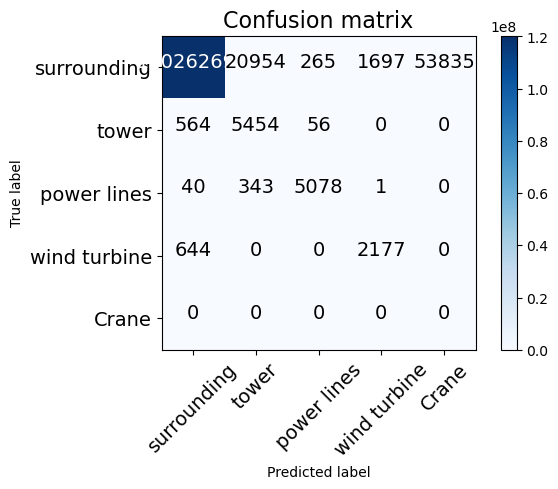

In [13]:
show_confusion_matrix(combined_matrix, classes=['surrounding', 'tower', 'power lines', 'wind turbine', 'Crane'])


Confusion matrix, without normalization


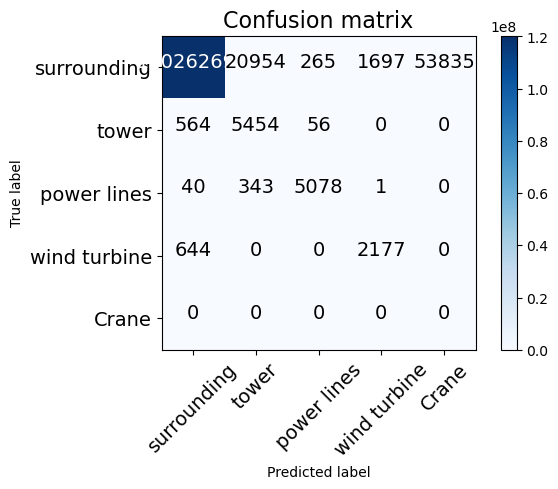

In [14]:
show_confusion_matrix(combined_matrix, classes=['surrounding', 'tower', 'power lines', 'wind turbine', 'Crane'])


/home/m.caros/work/3DSemanticSegmentation/utils/utils_plot.py:766: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix


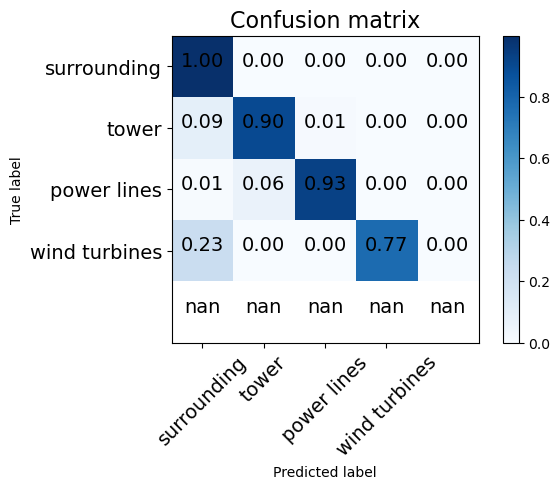

In [15]:
show_confusion_matrix(combined_matrix, normalize=True, classes=['surrounding', 'tower', 'power lines', 'wind turbines'])
